In [1]:
from eval import *
from IPython.display import display, Audio


C:\Users\safiu\FastSpeech+LJ\audio\stft.py:43: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  fft_window = pad_center(fft_window, filter_length)
C:\Users\safiu\FastSpeech+LJ\audio\stft.py:130: FutureWarning: Pass sr=22050, n_fft=1024, n_mels=80, fmin=0.0, fmax=8000.0 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_basis = librosa_mel_fn(


### Train 50 epoch, dropout 0.4

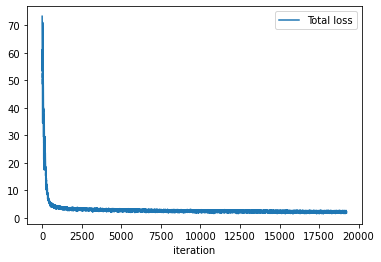

In [2]:
with open('logger/total_loss.txt', 'r') as f:
    lines = f.readlines()
    x = [float(line.split()[0]) for line in lines]
    
plt.plot(x, label='Total loss')
plt.xlabel('iteration')
plt.legend()

###  Test

In [3]:
test1 = "Accept the things to which fate binds you, and love the people with whom fate brings you together, but do so with all your heart"
test2 = "We suffer more often in imagination than in reality"
test3 = "Wasserstein distance or Kantorovich Rubinstein metric is a distance function defined between probability distributions on a given metric space"
texts = [test1,test2,test3]
samples = [text.text_to_sequence(i, hp.text_cleaners) for i in texts]


In [4]:
wave_glow = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_waveglow', model_math='fp32')
wave_glow = wave_glow.remove_weightnorm(wave_glow)
wave_glow.cuda().eval()
WaveGlow = wave_glow
model_choise = 18000
alpha = 1.3
model = get_DNN(model_choise)



Using cache found in C:\Users\safiu/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub
C:\Users\safiu/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub\PyTorch\Classification\ConvNets\image_classification\models\common.py:13: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn(
C:\Users\safiu/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub\PyTorch\Classification\ConvNets\image_classification\models\efficientnet.py:17: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn(


Accept the things to which fate binds you, and love the people with whom fate brings you together, but do so with all your heart


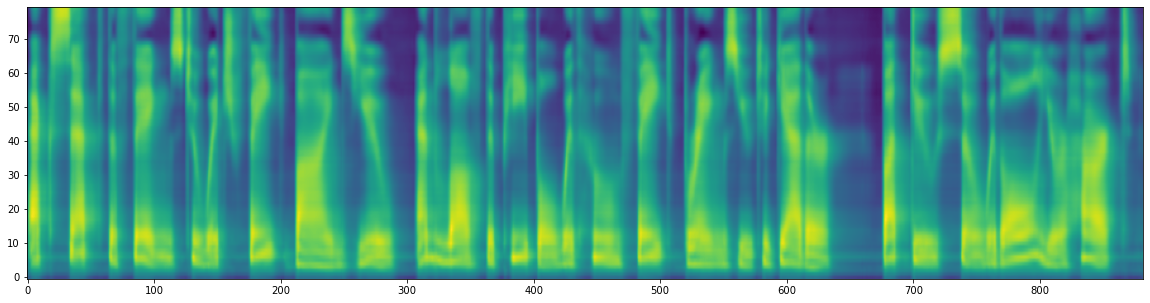

C:\Users\safiu\FastSpeech+LJ\audio\audio_processing.py:52: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  win_sq = librosa_util.pad_center(win_sq, n_fft)


Wav:


NVIDIA vocoder:


We suffer more often in imagination than in reality


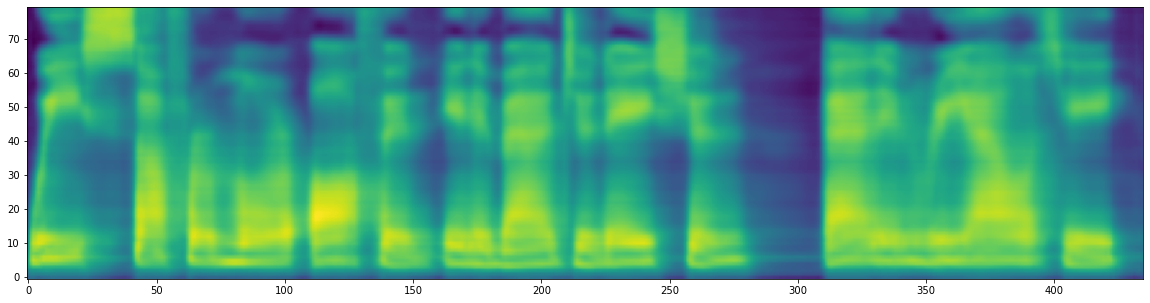

Wav:


NVIDIA vocoder:


Wasserstein distance or Kantorovich Rubinstein metric is a distance function defined between probability distributions on a given metric space


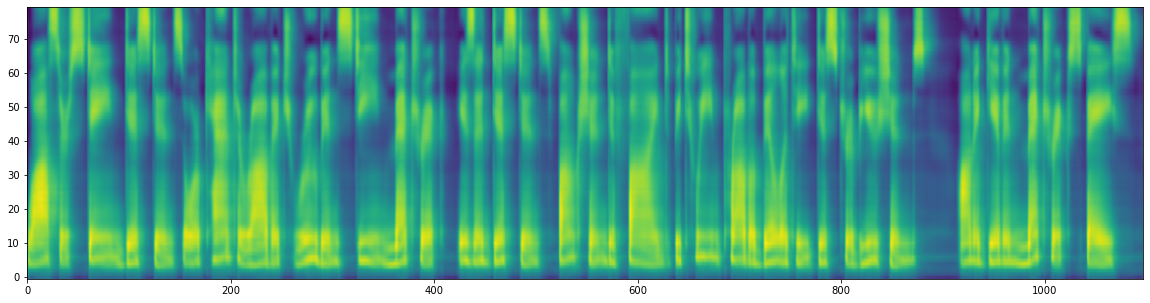

Wav:


NVIDIA vocoder:


In [5]:
for i, phn in enumerate(samples):
        print(texts[i])
        mel, mel_cuda = synthesis(model, phn, alpha)

        plt.figure(figsize=(20,5))
        plt.imshow(mel_cuda.detach().cpu()[0], aspect='auto', origin='lower')
        plt.show()
        audio_ = audio.tools.get_wav(
            mel)
        audio_waveglow = waveglow.inference.get_wav(
            mel_cuda, WaveGlow)
        print('Wav:')
        display(Audio(data=audio_, rate=22050))
        print ('NVIDIA vocoder:')
        display(Audio(data=audio_waveglow, rate=22050))

### Получили различимый robovoice - хороший знак. Waveglow немного убавил его интенсивность и повысил четкость речи